<a href="https://colab.research.google.com/github/JaviARo/Actividad-3.2/blob/main/JavierAlemanRodriguez_Penguins_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Javier Alemán Rodríguez

In [1]:
# Importación de librerías
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# importación de datos
penguins = sns.load_dataset('penguins')

# Quitamos los valores faltantes
penguins.dropna(inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
# Función para visualizar la matriz de confusión que se llama más adelante

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [6]:
def naive_bayes_classifier(model):
  print(model)
  # Separamos datos de entrada y salida
  X_penguins = penguins.drop('species', axis=1)
  y_penguins = penguins['species']
  X_penguins['island'].replace(['Torgersen', 'Dream', 'Biscoe'],[0, 1, 2], inplace=True)
  X_penguins['sex'].replace(['Female', 'Male'],[0, 1], inplace=True)

  # Separamos train y test
  Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.20, random_state=1)

  # Entrenamiento con los datos
  model.fit(Xtrain, ytrain)

  # Predicción con nuevos datos
  y_model = model.predict(Xtest)

  # Evaluación
  # Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
  print(accuracy_score(ytest, y_model)) # Precisión del modelo

  # Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
  ytest_df= ytest.to_frame()
  ytest_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'],[0, 1, 2], inplace=True)


  # Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
  # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
  y_model_df= pd.DataFrame(y_model, columns = ['species'])
  y_model_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'],[0, 1, 2], inplace=True)

  # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
  y_model_array = y_model_df['species'].to_numpy()

  # Creamos este array porque es el parámetro con las clases que espera la función
  clases_penguins = np.array(['Adelie', 'Gentoo', 'Chinstrap'])
  plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False,
                        title='Normalized confusion matrix', titleSup=str(model)[0:-2])

GaussianNB()
0.9402985074626866
Confusion matrix, without normalization
[[24  0  4]
 [ 0 22  0]
 [ 0  0 17]]
MultinomialNB()
0.746268656716418
Confusion matrix, without normalization
[[22  5  1]
 [ 3 19  0]
 [ 7  1  9]]
ComplementNB()
0.5970149253731343
Confusion matrix, without normalization
[[18 10  0]
 [ 0 22  0]
 [15  2  0]]
BernoulliNB()
0.3880597014925373
Confusion matrix, without normalization
[[18 10  0]
 [14  8  0]
 [ 7 10  0]]
CategoricalNB()
0.9253731343283582
Confusion matrix, without normalization
[[26  1  1]
 [ 0 22  0]
 [ 3  0 14]]


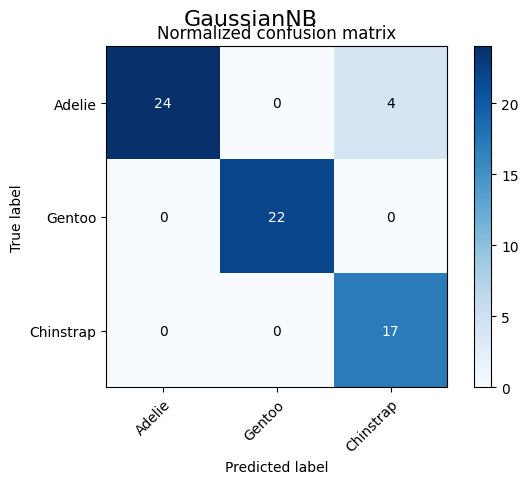

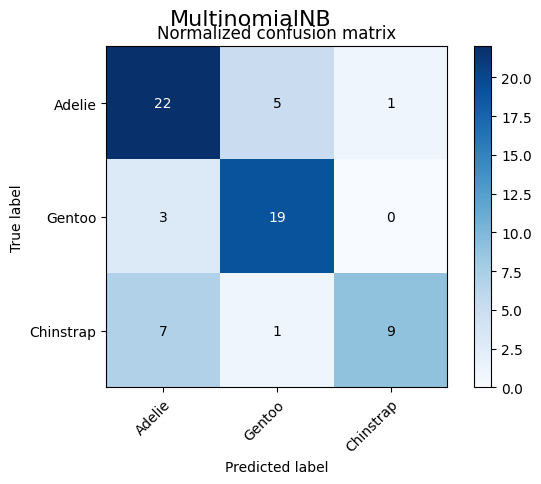

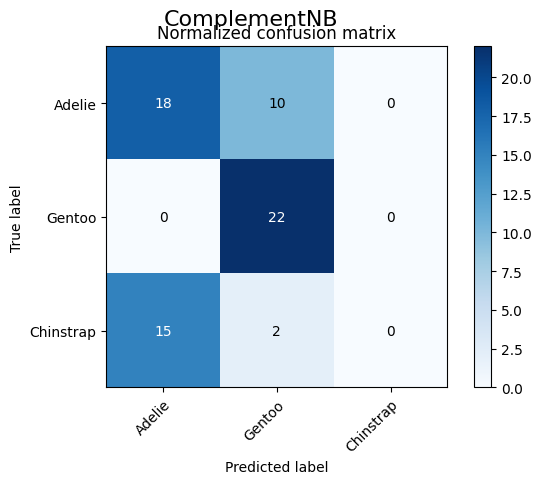

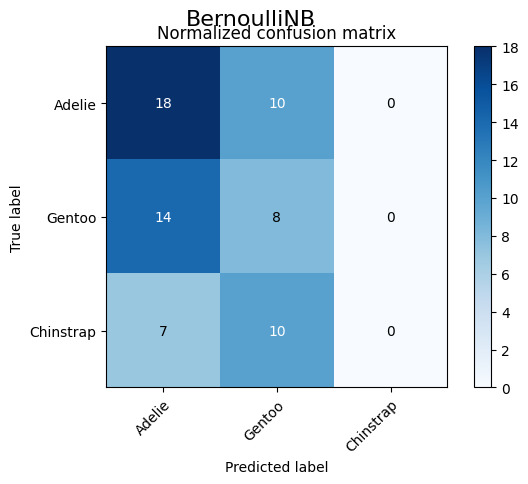

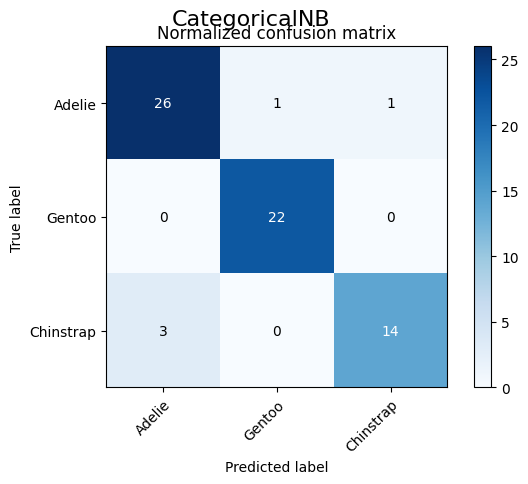

In [7]:
# Instanciamos los modelos
models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB(), CategoricalNB()]
for model in models:
  naive_bayes_classifier(model)